In [1]:
import mlrose_hiive
import numpy as np

from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from matplotlib import pyplot as plt
from numpy import inf
import time

In [2]:
# Generate a new TSP problem using a fixed seed.
problem_fit = TSPGenerator().generate(seed=123456, number_of_cities=10)

In [3]:
# Solve problem using the genetic algorithm
#GA POPSIZE = 200
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=200)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

1.1220324039459229
[3 9 7 4 5 6 2 1 8 0]
712.4692884672162


In [5]:
curve_GA = fitness_curve
fitness_GA = best_fitness

In [4]:
#GA POPSIZE = 250
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=250)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.8394882678985596
[1 8 0 3 9 7 4 5 6 2]
712.4692884672163


In [5]:
#GA POPSIZE = 150
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=50)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.16971731185913086
[7 9 3 0 8 1 2 6 5 4]
712.4692884672162


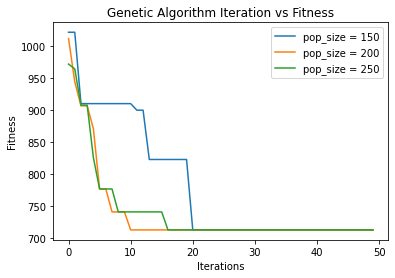

In [6]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Genetic Algorithm Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [9]:
#RCH RESTARTS=0
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=0, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.006000995635986328
[9 3 0 8 6 2 1 5 4 7]
842.6078455728849


In [6]:
#RCH RESTARTS=10
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=10, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.08259773254394531
[7 9 3 0 8 1 2 6 5 4]
712.4692884672162


In [7]:
curve_RHC = fitness_curve_pro
fitness_RHC = best_fitness

In [11]:
#RCH RESTARTS=5
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=5, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.031006813049316406
[7 9 3 0 8 1 2 6 5 4]
712.4692884672162


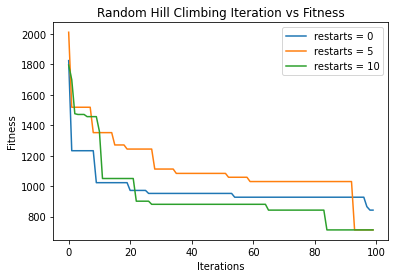

In [12]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='restarts = 5')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='restarts = 10')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Random Hill Climbing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [15]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.010001182556152344
[4 7 9 3 0 8 1 2 6 5]
712.4692884672163


In [16]:
#SA schedule = arithdecay
start = time.time()
schedule = mlrose_hiive.ArithDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.01201939582824707
[9 3 0 8 1 2 6 5 4 7]
712.4692884672163


In [19]:
#SA schedule = expdecay
start = time.time()
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.05, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, schedule=schedule, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.012004852294921875
[1 2 6 5 4 7 9 3 0 8]
712.4692884672163


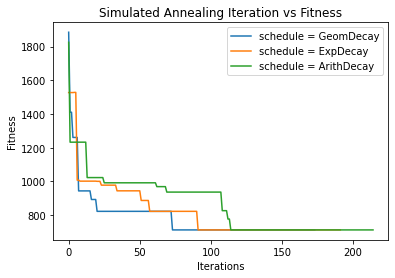

In [20]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='schedule = ExpDecay')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='schedule = ArithDecay')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [21]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.011705160140991211
[4 7 9 3 0 8 1 2 6 5]
712.4692884672163


In [22]:
#SA schedule = geomdecay decay 0.75
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.75, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.013003826141357422
[9 3 0 8 1 2 6 5 4 7]
712.4692884672163


In [23]:
#SA schedule = geomdecay decay 0.55
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.55, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.012003660202026367
[1 2 6 5 4 7 9 3 0 8]
712.4692884672163


In [8]:
#SA schedule = geomdecay decay 0.35
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.35, min_temp=1)
best_state, best_fitness, fitness_curve_pro3 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=4)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.01679062843322754
[3 0 8 1 2 6 5 4 7 9]
712.4692884672163


In [9]:
curve_SA = fitness_curve_pro3
fitness_SA = best_fitness

In [25]:
#SA schedule = geomdecay decay 0.15
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.15, min_temp=1)
best_state, best_fitness, fitness_curve_pro4 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=5)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.014003276824951172
[5 6 2 1 8 0 3 9 7 4]
712.4692884672162


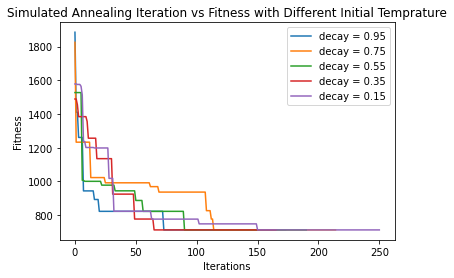

In [26]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='decay = 0.75')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='decay = 0.55')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro3))), fitness_curve_pro3[:,0], label='decay = 0.35')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro4))), fitness_curve_pro4[:,0], label='decay = 0.15')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness with Different Initial Temprature")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [29]:
#MIMIC POPSIZE = 200
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

8.907653570175171
[9 4 7 3 0 8 1 6 2 5]
892.1169872534932


In [10]:
#MIMIC POPSIZE = 250
start = time.time()
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.mimic(problem_fit, pop_size=250, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

15.665591478347778
[3 8 0 9 7 4 5 6 2 1]
789.7546712472574


In [11]:
curve_MIMIC = fitness_curve_pro
fitness_MIMIC = best_fitness

In [31]:
#MIMIC POPSIZE = 150
start = time.time()
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.mimic(problem_fit, pop_size=150, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

7.003309726715088
[9 7 0 8 3 1 2 6 5 4]
842.4823105291886


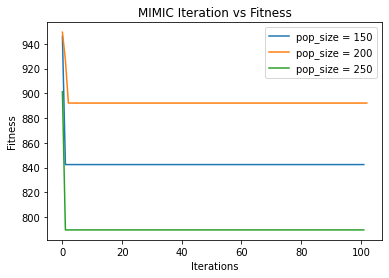

In [32]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

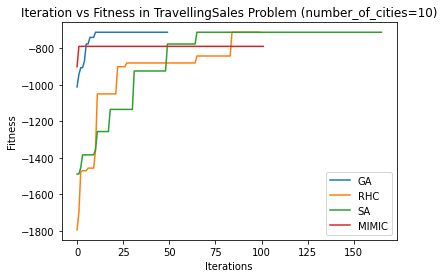

In [14]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(curve_GA))), -curve_GA[:,0], label='GA')  # ... and some more.
ax.plot(range(0,len(list(curve_RHC))), -curve_RHC[:,0], label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(curve_SA))), -curve_SA[:,0], label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(curve_MIMIC))), -curve_MIMIC[:,0], label='MIMIC')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness in TravellingSales Problem (number_of_cities=10)")  # Add a title to the axes.
ax.legend()  # Add a legend.